In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv('news_data.csv')

In [34]:
df.head(5)

,news,category
0,painful huge reversal fee income unheard among...,Business
1,formidable opposition alliance among congress ...,Politics
2,asian currencies trading lower today south kor...,Business
3,want answer question click answer clicking ans...,Technology
4,global markets gold prices edged today disappo...,Business


In [35]:
df.shape

(8748, 2)

In [36]:
df.columns.unique()

Index(['news', 'category'], dtype='object')

In [37]:
df.isnull().sum()

news        0
category    0
dtype: int64

In [38]:
df['category'].value_counts()

Technology       2997
Entertainment    2146
Politics         1911
Business         1246
Sports            225
World             223
Name: category, dtype: int64

In [39]:
df['categoryId'] = df['category'].factorize()[0]
df.head()

,news,category,categoryId
0,painful huge reversal fee income unheard among...,Business,0
1,formidable opposition alliance among congress ...,Politics,1
2,asian currencies trading lower today south kor...,Business,0
3,want answer question click answer clicking ans...,Technology,2
4,global markets gold prices edged today disappo...,Business,0


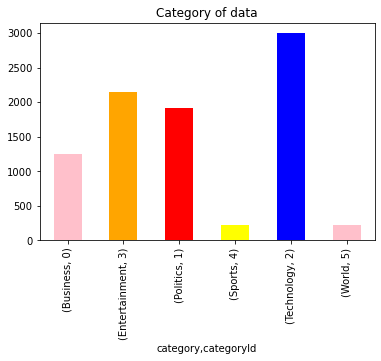

In [40]:
df.groupby('category').categoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.title("Category of data")
plt.show()

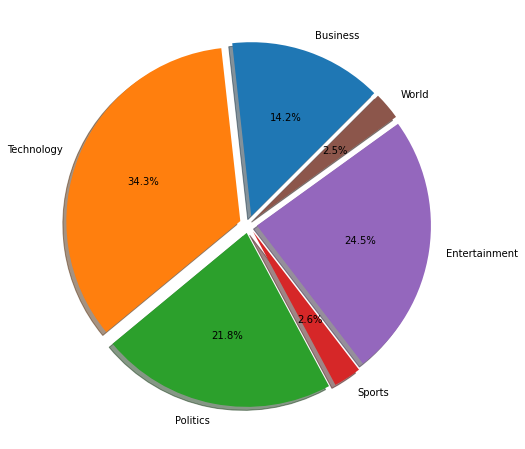

In [41]:
fig = plt.figure(figsize = (8,8))

Business = df[df['categoryId'] == 0 ]
Technology = df[df['categoryId']  == 2 ]
Politics = df[df['categoryId']  == 1]
Sports =df[df['categoryId'] == 4]
Entertainment = df[df['categoryId']  == 3]
World = df[df['categoryId']  == 5]

count = [Business['categoryId'].count(),
         Technology ['categoryId'].count(), 
         Politics['categoryId'].count(), 
         Sports['categoryId'].count(), 
         Entertainment['categoryId'].count(),
         World['categoryId'].count()]
pie = plt.pie(count, labels = ['Business', 'Technology', 'Politics', 'Sports', 'Entertainment','World'],
              autopct = "%1.1f%%",
              shadow = True,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05))

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
x = df['news']
y = df['category']
cv = CountVectorizer()
X = cv.fit_transform(x)


In [44]:
cv.get_feature_names_out()

array(['00', '000', '01', ..., 'zweli', 'zyada', 'zynga'], dtype=object)

In [45]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train,y_train)

MultinomialNB()

In [48]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model_NB.predict(data)
print(output)

Enter a Text: : Sanjay Dutt roped in for Vijay’s next; charges Rs 10 cr
['Entertainment']


In [87]:
NB = model_NB.score(X_test,y_test)
NB

0.9554285714285714

In [50]:
nb_predicted = model_NB.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, nb_predicted)

print(cf_matrix)

[[371   0   2   0   3   0]
 [  1 630  21   1  15   2]
 [  6   4 532   0  11   0]
 [  0   5   0  70   0   1]
 [ 11   7   9   1 850  12]
 [  0   2   3   0   0  55]]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (2).

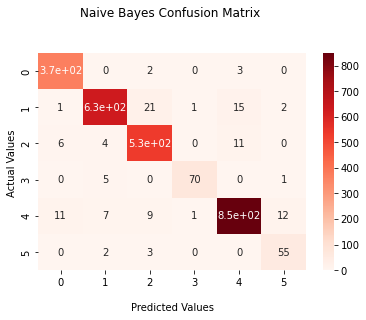

In [52]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Naive Bayes Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_predicted))

               precision    recall  f1-score   support

     Business       0.95      0.99      0.97       376
Entertainment       0.97      0.94      0.96       670
     Politics       0.94      0.96      0.95       553
       Sports       0.97      0.92      0.95        76
   Technology       0.97      0.96      0.96       890
        World       0.79      0.92      0.85        60

     accuracy                           0.96      2625
    macro avg       0.93      0.95      0.94      2625
 weighted avg       0.96      0.96      0.96      2625



In [55]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
LRG =model_lr.score(X_test,y_test)
LRG

0.9493333333333334

In [58]:
lr_predicted = model_lr.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, lr_predicted)
print(cf_matrix)

[[352  16   2   0   6   0]
 [  0 661   7   0   2   0]
 [  6  22 514   0  10   1]
 [  0   5   0  70   1   0]
 [ 10  30   2   0 845   3]
 [  0   3   3   1   3  50]]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (2).

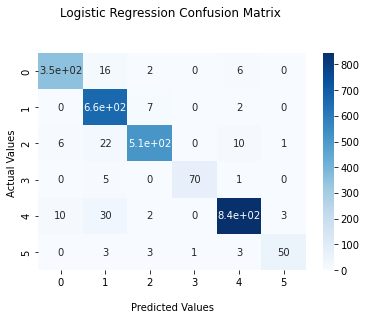

In [60]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_predicted))

               precision    recall  f1-score   support

     Business       0.96      0.94      0.95       376
Entertainment       0.90      0.99      0.94       670
     Politics       0.97      0.93      0.95       553
       Sports       0.99      0.92      0.95        76
   Technology       0.97      0.95      0.96       890
        World       0.93      0.83      0.88        60

     accuracy                           0.95      2625
    macro avg       0.95      0.93      0.94      2625
 weighted avg       0.95      0.95      0.95      2625



In [62]:
from sklearn.neighbors import KNeighborsClassifier
model_k= KNeighborsClassifier()
model_k.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
KNN =model_k.score(X_test,y_test)
KNN

0.6415238095238095

In [64]:
k_predicted = model_k.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, k_predicted)
print(cf_matrix)

[[183 183   4   0   6   0]
 [  0 662   4   0   1   3]
 [  7 169 376   0   1   0]
 [  0  53   1  22   0   0]
 [ 25 422  13   0 425   5]
 [  0  38   5   1   0  16]]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (2).

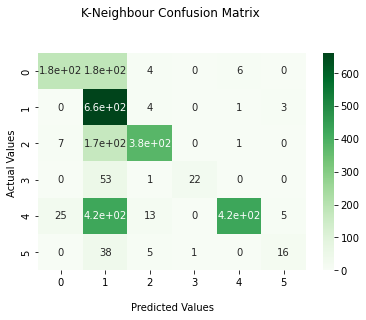

In [66]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('K-Neighbour Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,k_predicted))

               precision    recall  f1-score   support

     Business       0.85      0.49      0.62       376
Entertainment       0.43      0.99      0.60       670
     Politics       0.93      0.68      0.79       553
       Sports       0.96      0.29      0.44        76
   Technology       0.98      0.48      0.64       890
        World       0.67      0.27      0.38        60

     accuracy                           0.64      2625
    macro avg       0.80      0.53      0.58      2625
 weighted avg       0.80      0.64      0.65      2625



In [68]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
DT_predict = model_DT.predict(X_test)

In [90]:
DT = model_DT.score(X_test,y_test)
DT

0.8563809523809524

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,DT_predict))

               precision    recall  f1-score   support

     Business       0.81      0.78      0.79       376
Entertainment       0.82      0.89      0.85       670
     Politics       0.87      0.89      0.88       553
       Sports       0.90      0.86      0.88        76
   Technology       0.89      0.86      0.88       890
        World       0.75      0.67      0.71        60

     accuracy                           0.86      2625
    macro avg       0.84      0.82      0.83      2625
 weighted avg       0.86      0.86      0.86      2625



In [71]:
from sklearn.svm import SVC
model_svm = SVC() 
model_svm.fit(X_train,y_train)
svm_predict = model_svm.predict(X_test)

In [91]:
SVM = model_svm.score(X_test,y_test)
SVM

0.9226666666666666

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_predict))

               precision    recall  f1-score   support

     Business       0.99      0.90      0.94       376
Entertainment       0.86      0.96      0.91       670
     Politics       0.97      0.88      0.92       553
       Sports       0.98      0.84      0.91        76
   Technology       0.92      0.95      0.94       890
        World       0.81      0.85      0.83        60

     accuracy                           0.92      2625
    macro avg       0.92      0.90      0.91      2625
 weighted avg       0.93      0.92      0.92      2625



In [74]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, svm_predict)
print(cf_matrix)

[[339  21   2   0  14   0]
 [  0 641   9   0  14   6]
 [  3  28 484   0  37   1]
 [  0   8   0  64   2   2]
 [  2  41   1   0 843   3]
 [  0   4   1   1   3  51]]


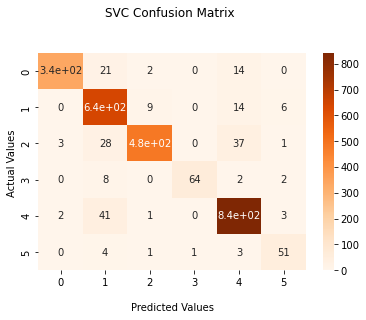

In [86]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')
ax.set_title('SVC Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

# Algorithm Performance Evaluation Graph

In [93]:
data={
    'Algorithm_name': ['Naive Bayes','Decition Tree','SVM Classifier','Logistic Regression', 'KNN Classifier'],
    'Accuracy': [NB,DT,SVM,LRG,KNN],
}
ds = pd.DataFrame(data)
ds

,Algorithm_name,Accuracy
0,Naive Bayes,0.955429
1,Decition Tree,0.856381
2,SVM Classifier,0.922667
3,Logistic Regression,0.949333
4,KNN Classifier,0.641524


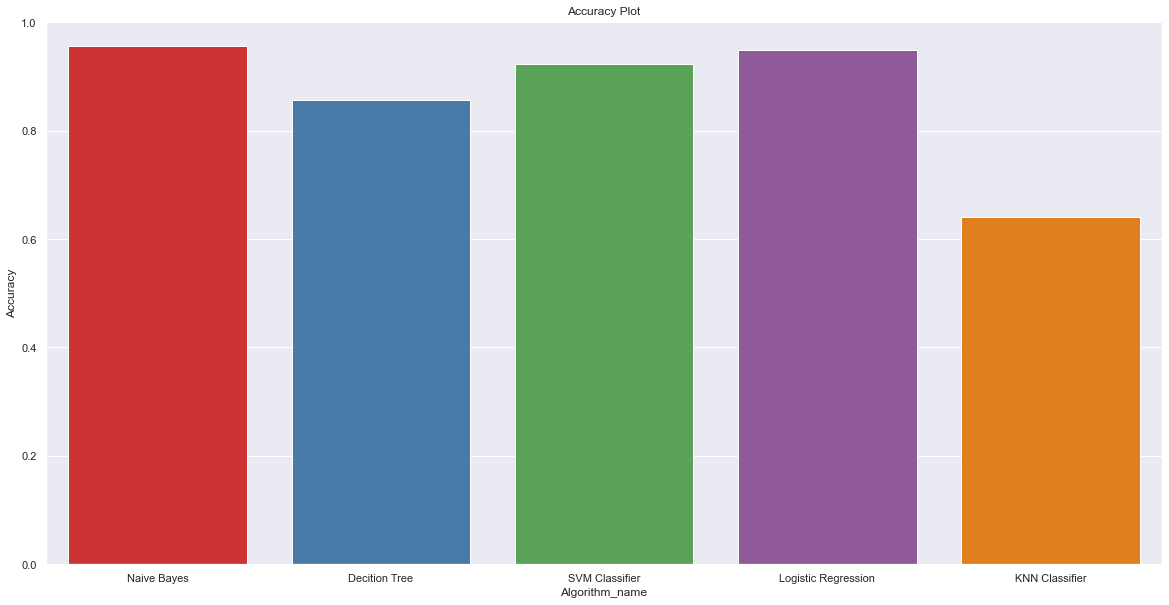

In [98]:
sns.set()
sns.barplot(x='Algorithm_name', y='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(20,10)})